In [1]:
from __future__ import annotations

import json

import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math font

values = json.load(open("values.json"))
runtimes = json.load(open("runtimes.json"))

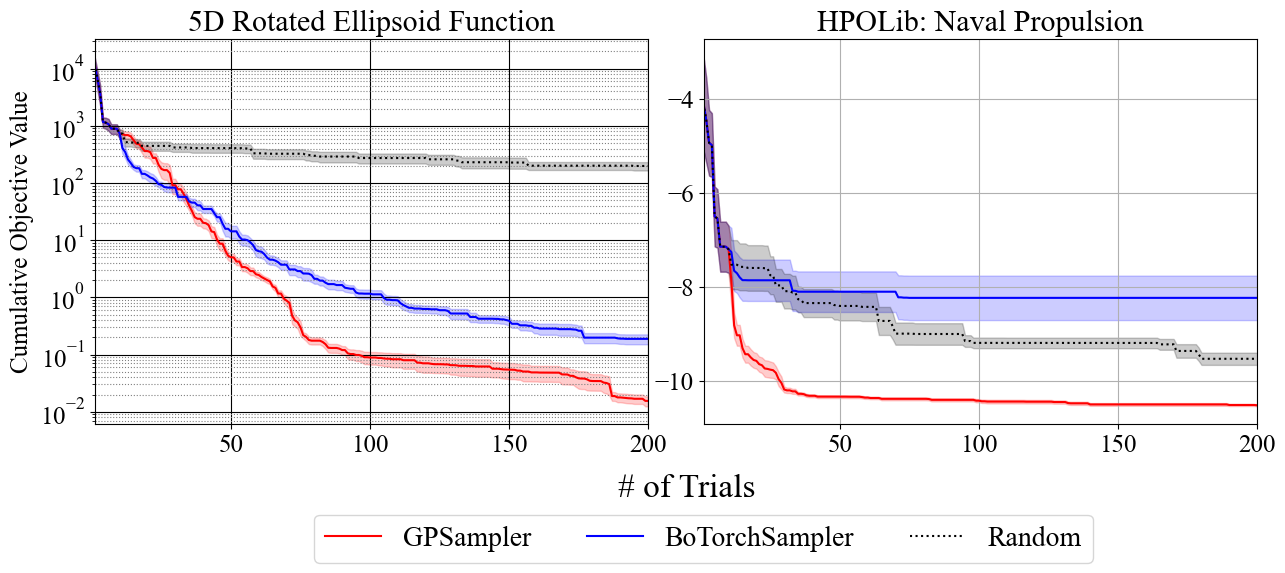

In [5]:
COLOR_DICT = {"gp": "red", "botorch": "blue", "rand": "black"}
LABEL_DICT = {"gp": "GPSampler", "botorch": "BoTorchSampler", "rand": "Random"}
LS_DICT = {"gp": None, "botorch": None, "rand": "dotted"}

def plot_performance_over_time(ax: plt.Axes, key: str) -> tuple[plt.Line2D, str]:
    sampler_name = key.split("/")[0]
    value = np.minimum.accumulate(values[key], axis=-1)
    color = COLOR_DICT[sampler_name]
    label = LABEL_DICT[sampler_name]
    n_seeds = len(value)
    n_trials = len(value[0])
    dx = np.arange(n_trials) + 1
    m = np.mean(value, axis=0)
    s = np.std(value, axis=0) / np.sqrt(n_seeds)
    line, = ax.plot(dx, m, color=color, label=label, ls=LS_DICT[sampler_name])
    ax.fill_between(dx, m - s, m + s, color=color, alpha=0.2)
    ax.set_xlim(1, n_trials)
    return line, label


fig, axes = plt.subplots(ncols=2, figsize=(15, 5), gridspec_kw={"wspace": 0.1})
ax = axes[0]
plot_info = [
    plot_performance_over_time(ax, "gp/cont"),
    plot_performance_over_time(ax, "botorch/cont"),
    plot_performance_over_time(ax, "rand/cont")
]
lines = [info[0] for info in plot_info]
labels = [info[1] for info in plot_info]
ax.set_title("5D Rotated Ellipsoid Function")
ax.set_yscale("log")
ax.set_ylabel("Cumulative Objective Value")
ax.grid(which='minor', color='gray', linestyle=':')
ax.grid(which='major', color='black')
ax.legend(
    handles=lines,
    loc='upper center',
    labels=labels,
    fontsize=20,
    bbox_to_anchor=(1.1, -0.2),  # ここは調整が必要です
    ncol=len(labels)
)

ax = axes[1]
plot_performance_over_time(ax, "gp/disc")
plot_performance_over_time(ax, "botorch/disc")
plot_performance_over_time(ax, "rand/disc")
ax.set_title("HPOLib: Naval Propulsion")
ax.grid()

fig.supxlabel("# of Trials", x=0.52, y=-0.05, fontsize=24)
plt.savefig("value.png", bbox_inches="tight")

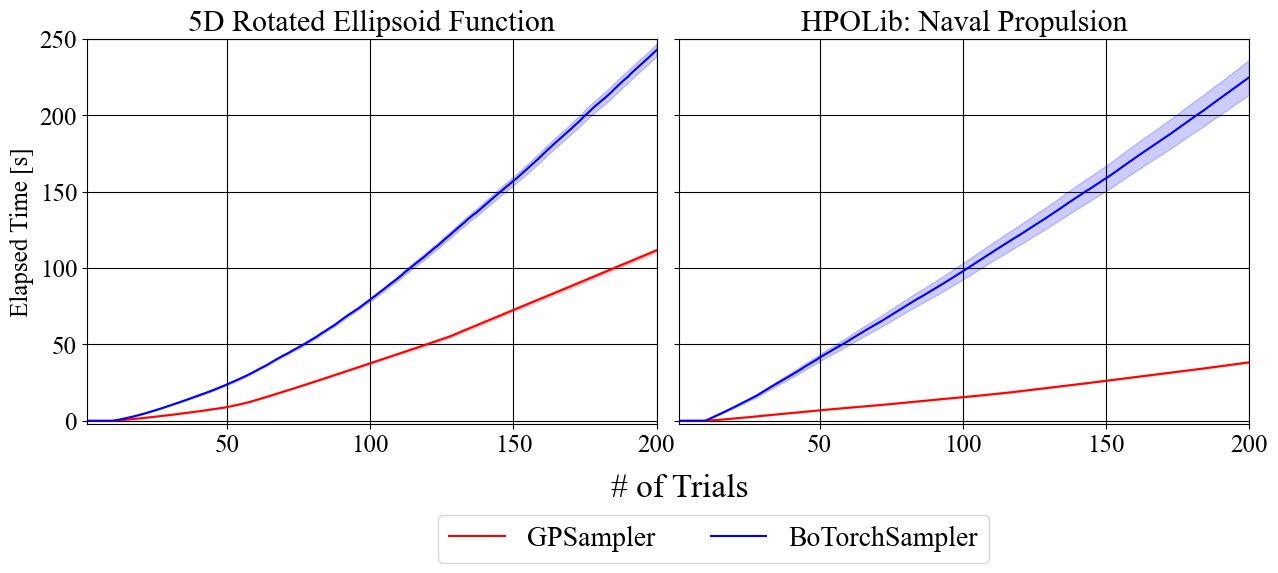

In [8]:
def plot_runtime(ax: plt.Axes, key: str) -> tuple[plt.Line2D, str]:
    value = runtimes[key]
    color = COLOR_DICT[key.split("/")[0]]
    label = LABEL_DICT[key.split("/")[0]]
    n_seeds = len(value)
    n_trials = len(value[0])
    dx = np.arange(n_trials) + 1
    m = np.mean(value, axis=0)
    s = np.std(value, axis=0) / np.sqrt(n_seeds)
    line, = ax.plot(dx, m, color=color, label=label)
    ax.fill_between(dx, m - s, m + s, color=color, alpha=0.2)
    ax.set_xlim(1, n_trials)
    ax.set_ylim(-2, 250)
    return line, label


fig, axes = plt.subplots(ncols=2, figsize=(15, 5), gridspec_kw={"wspace": 0.04}, sharey=True)
ax = axes[0]
plot_info = [
    plot_runtime(ax, "gp/cont"),
    plot_runtime(ax, "botorch/cont")   
]
lines = [info[0] for info in plot_info]
labels = [info[1] for info in plot_info]
ax.set_title("5D Rotated Ellipsoid Function")
# ax.set_yscale("log")
ax.set_ylabel("Elapsed Time [s]")
ax.grid(which='minor', color='gray', linestyle=':')
ax.grid(which='major', color='black')
ax.legend(
    handles=lines,
    loc='upper center',
    labels=labels,
    fontsize=20,
    bbox_to_anchor=(1.1, -0.2),  # ここは調整が必要です
    ncol=len(labels)
)

ax = axes[1]
plot_runtime(ax, "gp/disc")
plot_runtime(ax, "botorch/disc")
ax.set_title("HPOLib: Naval Propulsion")
ax.grid(which='minor', color='gray', linestyle=':')
ax.grid(which='major', color='black')

fig.supxlabel("# of Trials", x=0.52, y=-0.05, fontsize=24)
plt.savefig("runtime.png", bbox_inches="tight")